<a href="https://colab.research.google.com/github/AdrianP03/ST1Capstone/blob/main/ST1Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1/ST1G Assignment 9 (Capstone Programming Project)**


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/ST1Capstone/

/content/drive/MyDrive/ST1Capstone


In [10]:
!ls

CellphoneData.csv


### This capstone project is based on the Mobile Price Prediction. The data is available from the Kaggle repository: (https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction).



*   It contains the details of cellphone prices and specifications.
*   My project task is to create a machine learning model which can predict cellphone prices based on their characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.


### Step 1: Reading the data Reading the data with python

In [11]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Reading the dataset
import pandas as pd
import numpy as np
CellphoneData = pd.read_csv('/content/drive/MyDrive/ST1Capstone/CellphoneData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CellphoneData.shape)

# Removing duplicate rows if any
CellphoneData=CellphoneData.drop_duplicates()
print('Shape After deleting duplicate values:', CellphoneData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CellphoneData.head(10)


Shape before deleting duplicate values: (161, 14)
Shape After deleting duplicate values: (161, 14)


,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


## Key observations from Step 1 about the Data Description


*   This file contains 161 different cellphones.
*   There are 14 attributes and they are outlined below.



*   **Product ID** - Product ID of the cellphone
*   **Price** - Price of the cellphone
*   **Sale** - Number of sales
*   **Weight** - Weight of the cellphone
*   **Resolution** - Resolution of the cellphone
*   **PPI** - Phone pixel density (pixels per inch)
*   **CPU Core** - Number of CPU cores of the cellphone
*   **CPU Freq** - CPU frequency of the cellphone
*   **Internal Mem** - Internal memory of the cellphone
*   **RAM** - RAM of the cellphone
*   **Rear Cam** - Megapixels of cellphone rear camera
*   **Front Cam** - Megapixels of cellphone front camera
*   **Battery** - Milliampere hours of the cellphone
*   **Thickness** - Thickness of the cellphone

# Step 2 : Problem Statement Definition
* Developing a predictive model to estimate the price of a cellphone based on its specifications.
* **Target Variable:** Price
* **Predictors/Features:** Price, Sale, Weight, Resolution, PPI, etc.

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* Based on the problem statement we need to create a supervised machine learning regression model, as the target variable (Price) is **Continuous**.

* This will enable me to predict the price of a cellphone using its specifications.


# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)
* We need to ensure that the histogram of the cellphone price displays characteristics of a bell curve or a slight skew to avoid potential biases or issues in the predictive model.

<Axes: >

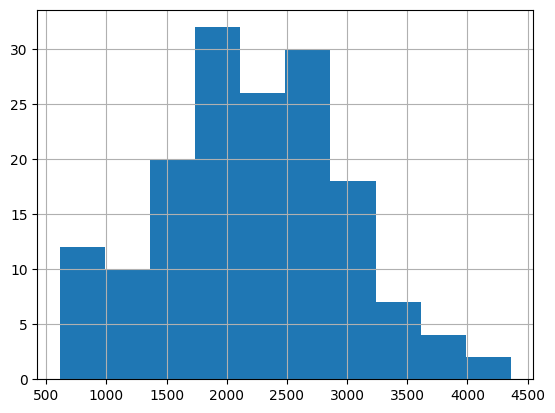

In [13]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the close values
CellphoneData['Price'].hist()

* **Vertical Axis:** Number of phones
* **Horizontal Axis:** Cellphone price

## Observations from Step 4
* The histogram represents a mostly balanced bell curve.
* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from.

## Step 5: Basic Exploratory Data Analysis

In [14]:
# Looking at sample rows in the data
CellphoneData.head()

,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [15]:
# Looking at sample rows in the data
CellphoneData.tail()

,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [16]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CellphoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   Weight        161 non-null    float64
 4   Resolution    161 non-null    float64
 5   PPI           161 non-null    int64  
 6   CPU Core      161 non-null    int64  
 7   CPU Freq      161 non-null    float64
 8   Internal Mem  161 non-null    float64
 9   RAM           161 non-null    float64
 10  Rear Cam      161 non-null    float64
 11  Front Cam     161 non-null    float64
 12  Battery       161 non-null    int64  
 13  Thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [17]:
# Looking at the descriptive statistics of the data
CellphoneData.describe(include='all')

,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [18]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
CellphoneData.nunique()

Product ID       83
Price            81
Sale            125
Weight           62
Resolution       24
PPI              45
CPU Core          6
CPU Freq         28
Internal Mem     10
RAM              12
Rear Cam         18
Front Cam        15
Battery          55
Thickness        49
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis

*   **Product ID** - Categorical. Not selected.
*   **Price** - Continuous. Selected. (Target Variable)
*   **Sale** - Continuous. Selected.
*   **Weight** - Continuous. Selected.
*   **Resolution** - Continuous. Selected.
*   **PPI** - Continuous. Selected.
*   **CPU Core** - Categorical. Selected.
*   **CPU Freq** - Continuous. Selected.
*   **Internal Mem** - Categorical. Selected.
*   **RAM** - Categorical. Selected.
*   **Rear Cam** - Continuous. Selected.
*   **Front Cam** - Continuous. Selected.
*   **Battery** - Continuous. Selected.
*   **Thickness** - Continuous. Selected.

## Step 7: Removing unwanted columns
* Product ID is qualitative data and do not affect cellphone sales in any way. This column is irrelevant to my analysis and has been removed.

## Step 8: Visual Exploratory Data Analysis

* Categorical Predictors:

* 'CPU Cores',
* 'RAM'
* 'Internal Memory'

* We will use bar charts to see how the data is distributed for these categorical columns.


In [19]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

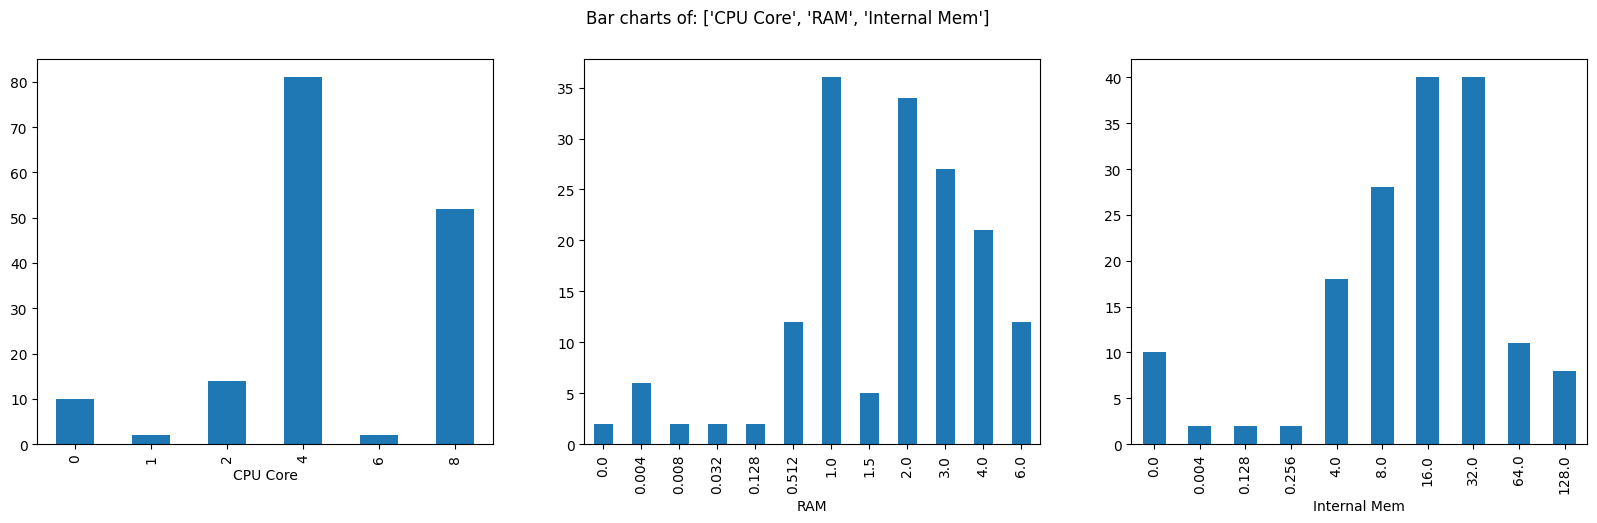

In [26]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=CellphoneData, colsToPlot=['CPU Core','RAM','Internal Mem'])